Pregunta 2

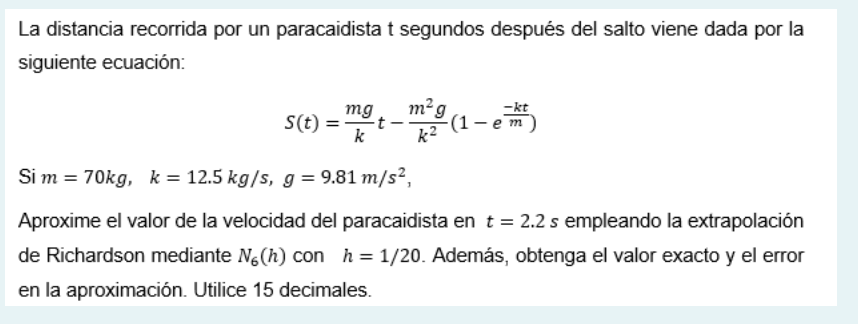

In [15]:
# Solución

from sympy import *

x= symbols("x")

# Declaro las constantes
m = 70
k = 12.5
g = 9.81

# Declaro mi función "g" de tiempo ocupando "x" como variable
g = ((m*g*x) / k ) - (((m**2 * g) / k**2) * (1 - exp((-k * x)/m)))

# Declaro mi "h", mi "c" y mi "n"

h = 1/20
c = 2.2
n=6

Para el desarrollo de esta extrapolación de Richarson necesitamos la matriz:

| N<sub>1</sub>(h) | N<sub>2</sub>(h) | N<sub>3</sub>(h) | N<sub>4</sub>(h) | N<sub>5</sub>(h) | N6(h) | 
|---|-----|-----|-----|-----|-----|
| N<sub>1</sub>(h/2) | N<sub>2</sub>(h/2) | N<sub>3</sub>(h/2) | N<sub>4</sub>(h/2) | N<sub>5</sub>(h/2) | | 
| N<sub>1</sub>(h/4) | N<sub>2</sub>(h/4) | N<sub>3</sub>(h/4) | N<sub>4</sub>(h/4) |  |  | 
| N<sub>1</sub>(h/8) | N<sub>2</sub>(h/8) | N<sub>3</sub>(h/8) |  | |  | 
| N<sub>1</sub>(h/16) | N<sub>2</sub>(h/16) |  ||  |  |
| N<sub>1</sub>(h/32) |  |  |  |  |  |

En donde encontramos nuestros valores iniciales (primera columna con):

$$ N_1(h) = \frac{g(c+h) - g(c-h)}{2h} $$

$$...$$

$$ N_1(\frac{h}{32}) = \frac{g(c+\frac{h}{32}) - g(c-\frac{h}{32})}{2(\frac{h}{32})} $$

In [16]:
# Solución con extrapolación de Richarson en python


# Declaro mi matriz basada en n para llenarla

from numpy import zeros, float64

N = zeros((n, n), dtype=float64)

print(N)


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [17]:
# Con un bucle lleno mi primera columna

for i in range(n):
    N[i][0] = (g.subs(x, c+h) - g.subs(x, c-h)) / (2*h)
    h = h/2

# Verifico la primera columna

print(N)




[[17.84682994  0.          0.          0.          0.          0.        ]
 [17.84719952  0.          0.          0.          0.          0.        ]
 [17.84729192  0.          0.          0.          0.          0.        ]
 [17.84731502  0.          0.          0.          0.          0.        ]
 [17.84732079  0.          0.          0.          0.          0.        ]
 [17.84732224  0.          0.          0.          0.          0.        ]]


In [18]:
# Verifico si los valores son aproximados al "valor exacto"
# Ya que de no ser así hay algún error en las fórmulas

valor_exacto = diff(g).subs(x, c)
print("El valor exacto es:", round(valor_exacto,15))


El valor exacto es: 17.8473227185773


In [19]:
# Para llenar el resto de la matriz, realizo un bucle for anidado
# para todo el resto de elementos

for j in range(1, n):
    for i in range(n-j):
        # La j es diferente a la fórmula por la forma de indexar de Python
        N[i][j] = (4**(j) * N[i+1][j-1] - N[i][j-1]) / (4**(j) - 1)

#imprimo de forma que se vea bien la matriz
for i in N:
    for j in i:
        print(str(j).ljust(19), end="  ")
    print("\n")


17.84682993550547    17.847322719068092   17.847322718574844   17.847322718580088   17.847322718572983   17.84732271858274    

17.847199523177437   17.84732271860567    17.847322718580006   17.84732271857301    17.847322718582728   0.0                  

17.847291919748614   17.84732271858161    17.84732271857312    17.847322718582692   0.0                  0.0                  

17.84731501887336    17.84732271857365    17.847322718582543   0.0                  0.0                  0.0                  

17.847320793648578   17.84732271858199    0.0                  0.0                  0.0                  0.0                  

17.847322237348635   0.0                  0.0                  0.0                  0.0                  0.0                  



In [20]:
# La posición (0, n-1), es decir el último valor de izquierda a derecha en la primer fila,
# nos da el valor aproximado

print("El valor exacto es:", round(valor_exacto,15))
aproximado = N[0][n-1]
print("El valor aproximado es:", round(aproximado, 15))
error = abs(aproximado - valor_exacto)
print("El error  es:", error)

El valor exacto es: 17.8473227185773
El valor aproximado es: 17.84732271858274
El error  es: 5.44275735592237e-12
